# FIT5202 Data processing for Big data

##  Activity: Exploratory Data Analysis with PySpark

In this lab, you will apply the concepts learned to perform a complete EDA on a real-world dataset using Apache PySpark. You will practice loading data, cleaning it, performing univariate and bivariate analysis, and generating visualizations to derive actionable insights.

### Dataset:
The "Bank Marketing" dataset from the UCI Machine Learning Repository. This dataset contains information from a direct marketing campaign of a Portuguese bank.

You shall download the dataset from Moodle or visit the original site:
https://archive.ics.uci.edu/dataset/222/bank+marketing

### Business Context:
The bank wants to understand which factors are most influential in a client's decision to subscribe to a term deposit. Our goal is to explore the data to generate hypotheses that could help the bank improve its marketing strategy.


Let's get started.


## Table of Contents

* [SparkContext and SparkSession](#one)
* [Import Plot Libraries](#import)
* [Start: Load Data](#start)        
* [Process: Data Cleaning and Preprocessing](#process1)    
* [Process: Initial Data Profiling](#process2)    
* [Univariate Analysis](#univariate)
* [Bivariate/Multivariate Analysis](#multivariate)
* [Process: Visualisation & Exploration](#process3)
* [Lab Task: Further Process](#process4)
* [Findings: Discuss with your peer students](#findings)

<a class="anchor" name="one"></a>
## Import Spark classes and create Spark Context

In [1]:
# Import SparkConf class into program
from pyspark import SparkConf

# local[*]: run Spark in local mode with as many working processors as logical cores on your machine
# If we want Spark to run locally with 'k' worker threads, we can specify as "local[k]".
master = "local[*]"
# The `appName` field is a name to be shown on the Spark cluster UI page
app_name = "Exploratory Data Analysis"
# Setup configuration parameters for Spark
spark_conf = SparkConf().setMaster(master).setAppName(app_name)

# Import SparkContext and SparkSession classes
from pyspark import SparkContext # Spark
from pyspark.sql import SparkSession # Spark SQL

# Method 1: Using SparkSession
spark = SparkSession.builder.config(conf=spark_conf).getOrCreate()
sc = spark.sparkContext
sc.setLogLevel('ERROR')

<a class="anchor" name="import"></a>
## Import Plot Libraries

Now we import plot libraries, we will use matplotlib and seaborn for this lab.

In [2]:
import matplotlib.pyplot as plt
import statistics
import pyspark.sql.functions as F
import pandas as pd
import seaborn as sns

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

## Start: <a class="anchor" name="start"></a>Data Ingestion and Initial Inspection
The first step is to load our data from the CSV file into a PySpark DataFrame. 

We will then perform some initial checks to ensure the data has been loaded correctly and to get a first look at its structure.

Note that this particular dataset uses a semicolon (;) as a separator, so we must specify that when reading the file.

### Metadata
Metadata is essentially "data about data". It gives you information about the dataset.

| Variable Name | Role	| Type |Demographic | Description |	Missing Values |
|----|----|----|----|:----|----|
| age | Feature | Integer | Age |  | 	no | 
| job	 | Feature | 	Categorical | 	Occupation | 	type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')	 | 	no | 
 | marital | 	Feature | 	Categorical | 	Marital Status | (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)	 | 	no | 
 | education | 	Feature | 	Categorical | 	Education Level  | 	(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')	 | 	no | 
 | default | 	Feature | 	Binary	 | |  	has credit in default?	 | 	no | 
 | balance | 	Feature | 	Integer	 | 	 | average yearly balance	euros | 	no | 
 | housing | 	Feature	 | Binary	 | 	 | has housing loan?		 | no | 
 | loan | 	Feature | 	Binary	 | 	 | has personal loan?	 | 	no | 
 | contact | Feature	 | Categorical		 |  | contact communication type (categorical: 'cellular','telephone')	 | 	yes | 
 | day_of_week	 | Feature | 	Date | 	 | 	last contact day of the week | 		no | 
 | month	 | Feature | 	Date	 | 	 | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')	 | 	no | 
 | duration	 | Feature | 	Integer	 |  | 	last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.	 | 	no | 
 | campaign	 | Feature	 | Integer | 	 | 	number of contacts performed during this campaign and for this client (numeric, includes last contact)	 | 	no | 
 | pdays | 	Feature  | 	Integer	 | 	 | number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)	 | 	yes | 
 | previous	 | Feature | 	Integer	 |  | 	number of contacts performed before this campaign and for this client	 | 	no | 
 | poutcome	 | Feature	 | Categorical | 	 | 	outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')	 | 	yes | 
 | y | 	Target | 	Binary	 |  | 	has the client subscribed a term deposit?	 | 	no | 

## Process: Data Cleaning and Preprocessing <a class="anchor" name="process1"></a>

In [3]:
# Load the dataset
# 'header=True' tells Spark to use the first row as the column names.
# 'inferSchema=True' tells Spark to go through the data and determine the data type for each column automatically.
# 'sep=';'' specifies the delimiter used in the file.
file_path = "data/bank-full.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True, sep=';')

In [4]:
# Print the schema to understand the column names and their data types.
# This is the PySpark equivalent of pandas'.info() method.
print("DataFrame Schema:")
df.printSchema()

DataFrame Schema:
root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)



<div style="background:rgba(0,109,174,0.2);padding:10px;border-radius:4px"><strong>Question</strong>: Look at the schema above. Do the inferred data types seem correct for each column? For example, is age an integer? Is balance an integer?</div>

In [5]:
# Show the first 10 rows of the DataFrame to get a feel for the data.
# This is the PySpark equivalent of pandas'.head() method.
print("Top 10 rows of the DataFrame:")
df.show(10)

Top 10 rows of the DataFrame:
+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|         job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
| 58|  management| married| tertiary|     no|   2143|    yes|  no|unknown|  5|  may|     261|       1|   -1|       0| unknown| no|
| 44|  technician|  single|secondary|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown| no|
| 33|entrepreneur| married|secondary|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown| no|
| 47| blue-collar| married|  unknown|     no|   1506|    yes|  no|unknown|  5|  may|      92|       1|   -1|       0| unknown| no|
| 33|     unknown|  single|  unknown|     no|      1|

In [6]:
# You can optionally convert it to Pandas dataframe for a prettier output.
df.pandas_api().head(10)

/opt/conda/lib/python3.10/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [7]:
# Get the total number of rows in the DataFrame.
#.count() is an "action" that triggers a Spark job to scan the entire dataset.
total_rows = df.count()
print(f"The dataset contains {total_rows} rows.")

The dataset contains 45211 rows.


### Data cleaning 
Data cleaning is a critical step. We will check for missing values and then transform our target variable y into a more analysis-friendly numerical format.

In [8]:
# A robust way to check for null values in each column of a PySpark DataFrame.
# We use a list comprehension to apply the check to all columns.
print("Null value counts per column:")
df.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in df.columns]).show()

# We can see this dataset is pre-cleaned already; however, in reallife, you often need to deal with dirty dataset.

Null value counts per column:
+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|  0|  0|      0|        0|      0|      0|      0|   0|      0|  0|    0|       0|       0|    0|       0|       0|  0|
+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+



<div style="background:rgba(0,109,174,0.2);padding:10px;border-radius:4px">The output shows that this dataset is very clean with no missing values. In a real-world project, you would now apply techniques like df.na.drop() or df.na.fill().  </div>  
<div style="background:rgba(0,109,174,0.2);padding:10px;border-radius:4px">Next, we will convert the target variable y from string ('yes'/'no') to integer (1/0). This makes it easy to calculate averages, which will directly correspond to the subscription rate. We'll create a new column called subscribed. </div>

In [9]:
# Use the withColumn() transformation to add a new column.
# The F.when() function is a SQL-like CASE WHEN statement.
# If the value in column 'y' is 'yes', the new 'subscribed' column gets a 1, otherwise it gets a 0.
df = df.withColumn('subscribed', F.when(F.col('y') == 'yes', 1).otherwise(0))

# Show the result to verify the new column
df.select('y', 'subscribed').show(5)

+---+----------+
|  y|subscribed|
+---+----------+
| no|         0|
| no|         0|
| no|         0|
| no|         0|
| no|         0|
+---+----------+
only showing top 5 rows



## Process: Initial Data Profiling <a class="anchor" name="process2"></a>


In [10]:
df.describe()

DataFrame[summary: string, age: string, job: string, marital: string, education: string, default: string, balance: string, housing: string, loan: string, contact: string, day: string, month: string, duration: string, campaign: string, pdays: string, previous: string, poutcome: string, y: string, subscribed: string]

In [11]:
# You can use the pandas describe function to have a quick view of data profiling.
df.pandas_api().describe()

,age,balance,day,duration,campaign,pdays,previous,subscribed
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1427.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


## Process: Univariate Analysis <a class="anchor" name="univariate"></a>
Now we begin our analysis by examining individual variables. For numerical columns, we'll look at summary statistics. For categorical columns, we'll look at frequency distributions.

In [12]:
# Use.describe() to get summary statistics for the numerical columns.
# This includes count, mean, standard deviation, min, and max.
print("Summary statistics for numerical columns:")
df.describe(['age', 'balance', 'duration', 'campaign']).show()

Summary statistics for numerical columns:
+-------+------------------+------------------+-----------------+------------------+
|summary|               age|           balance|         duration|          campaign|
+-------+------------------+------------------+-----------------+------------------+
|  count|             45211|             45211|            45211|             45211|
|   mean| 40.93621021432837|1362.2720576850766|258.1630797814691| 2.763840658246887|
| stddev|10.618762040975401|3044.7658291685243|257.5278122651712|3.0980208832791813|
|    min|                18|             -8019|                0|                 1|
|    max|                95|            102127|             4918|                63|
+-------+------------------+------------------+-----------------+------------------+



Question: What can you infer from the summary statistics?  
What is the average age of a client?  
Look at the balance column. The mean is 1362, but the standard deviation is very high (3044). What might this suggest about the distribution of client balances?  
The max duration is 4918 seconds (over 80 minutes). Does this seem plausible for a marketing call? What might this represent?  


Now let's analyze a categorical variable. We will use the "aggregate in Spark, plot in Pandas" pattern. We'll find the frequency of each job type.

In [13]:
# Step 1: Perform the aggregation in PySpark
# Group by the 'job' column and count the occurrences of each.
# Order by the count in descending order for a cleaner plot.
job_counts_df = df.groupBy('job').count().orderBy(F.desc('count'))

In [14]:
# Step 2: Convert the small, aggregated result to a Pandas DataFrame
job_counts_pd = job_counts_df.toPandas()

<IPython.core.display.Javascript object>


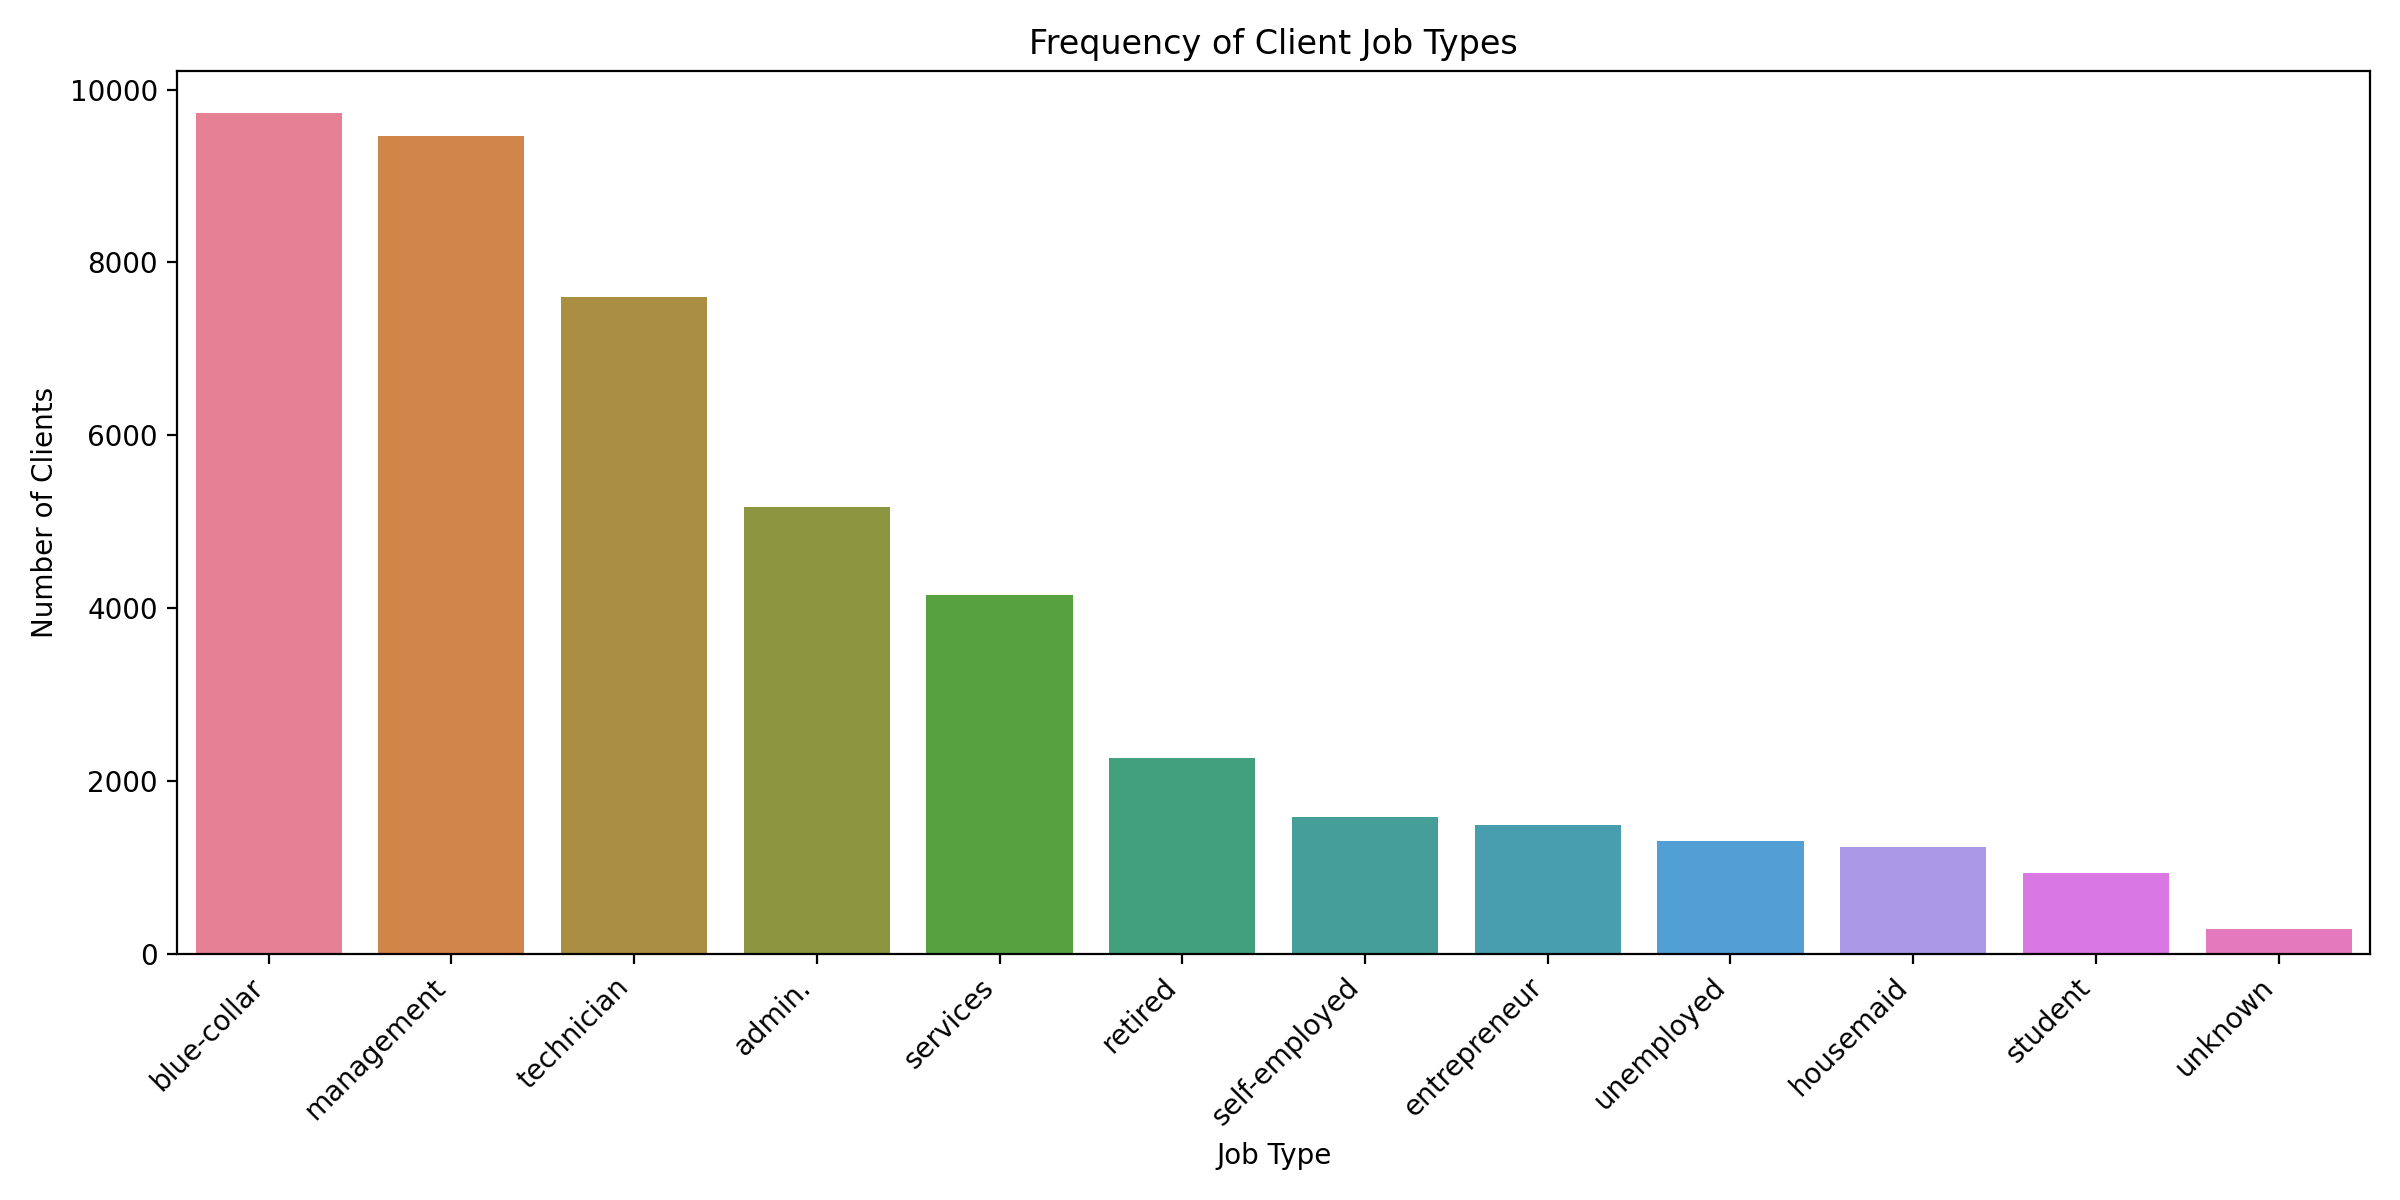

In [15]:
# Step 3: Create the plot using Matplotlib/Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=job_counts_pd, x='job', y='count', hue='job')
plt.title('Frequency of Client Job Types')
plt.xlabel('Job Type')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Lab Exercise: Now, create similar bar charts for the marital and education columns. What are the most common categories in each?

<IPython.core.display.Javascript object>


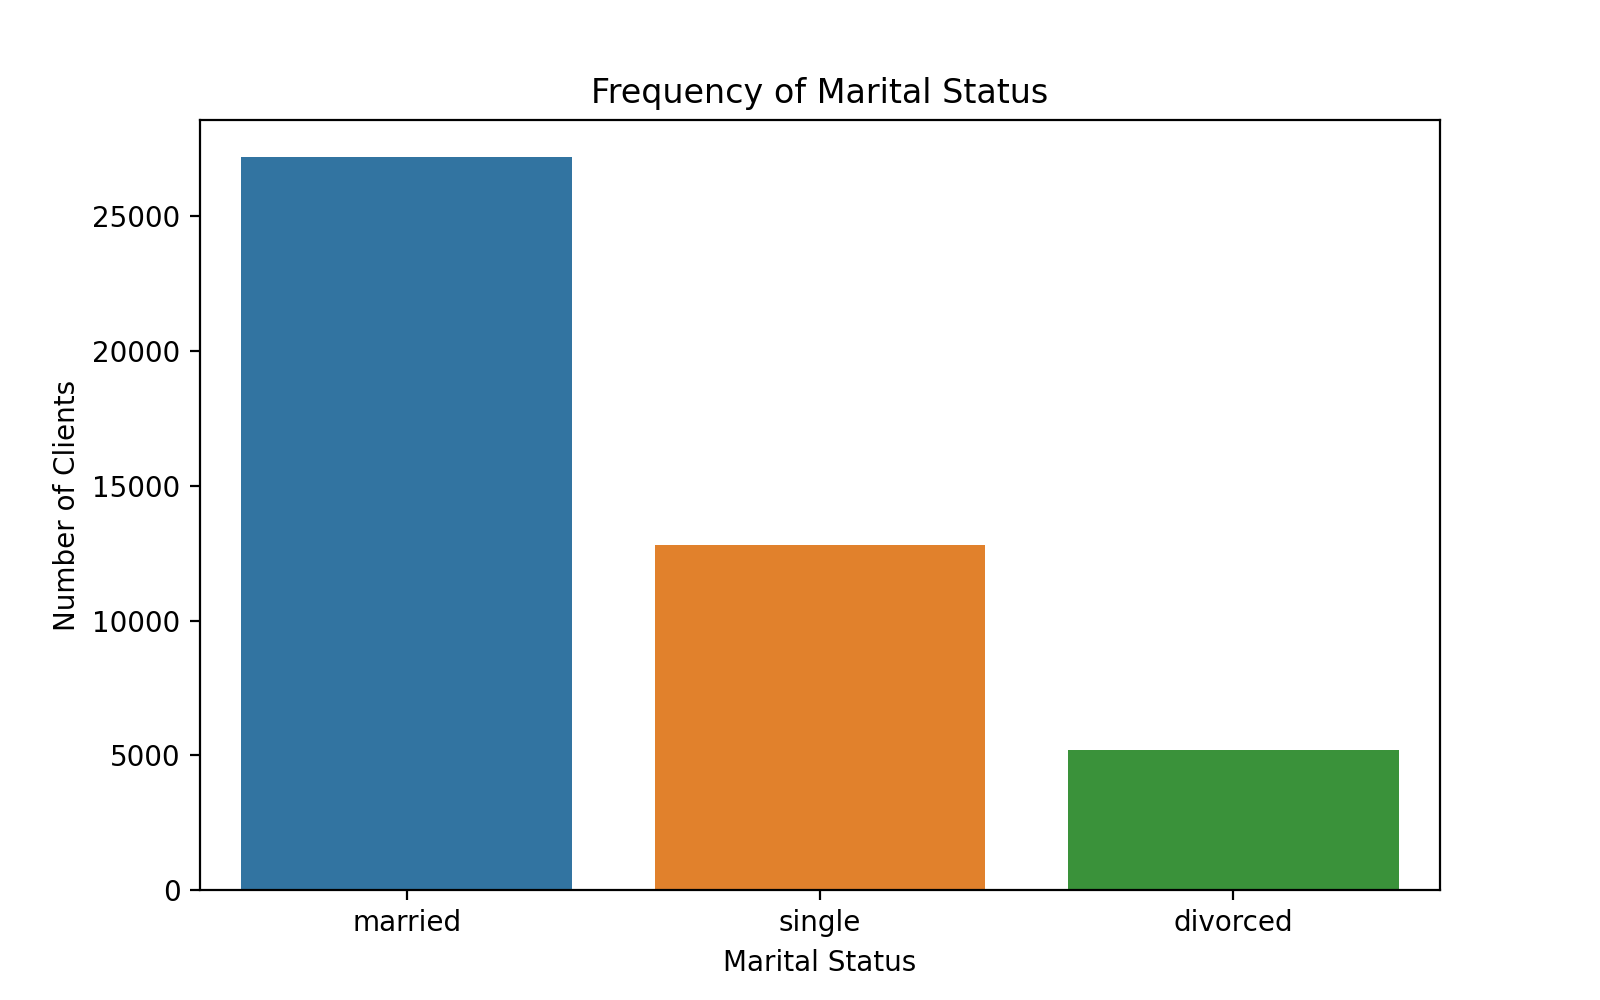

In [16]:
# Analysis for 'marital' status
marital_counts_pd = df.groupBy('marital').count().orderBy(F.desc('count')).toPandas()
plt.figure(figsize=(8, 5))
sns.barplot(data=marital_counts_pd, x='marital', y='count', hue='marital')
plt.title('Frequency of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of Clients')
plt.show()

<IPython.core.display.Javascript object>


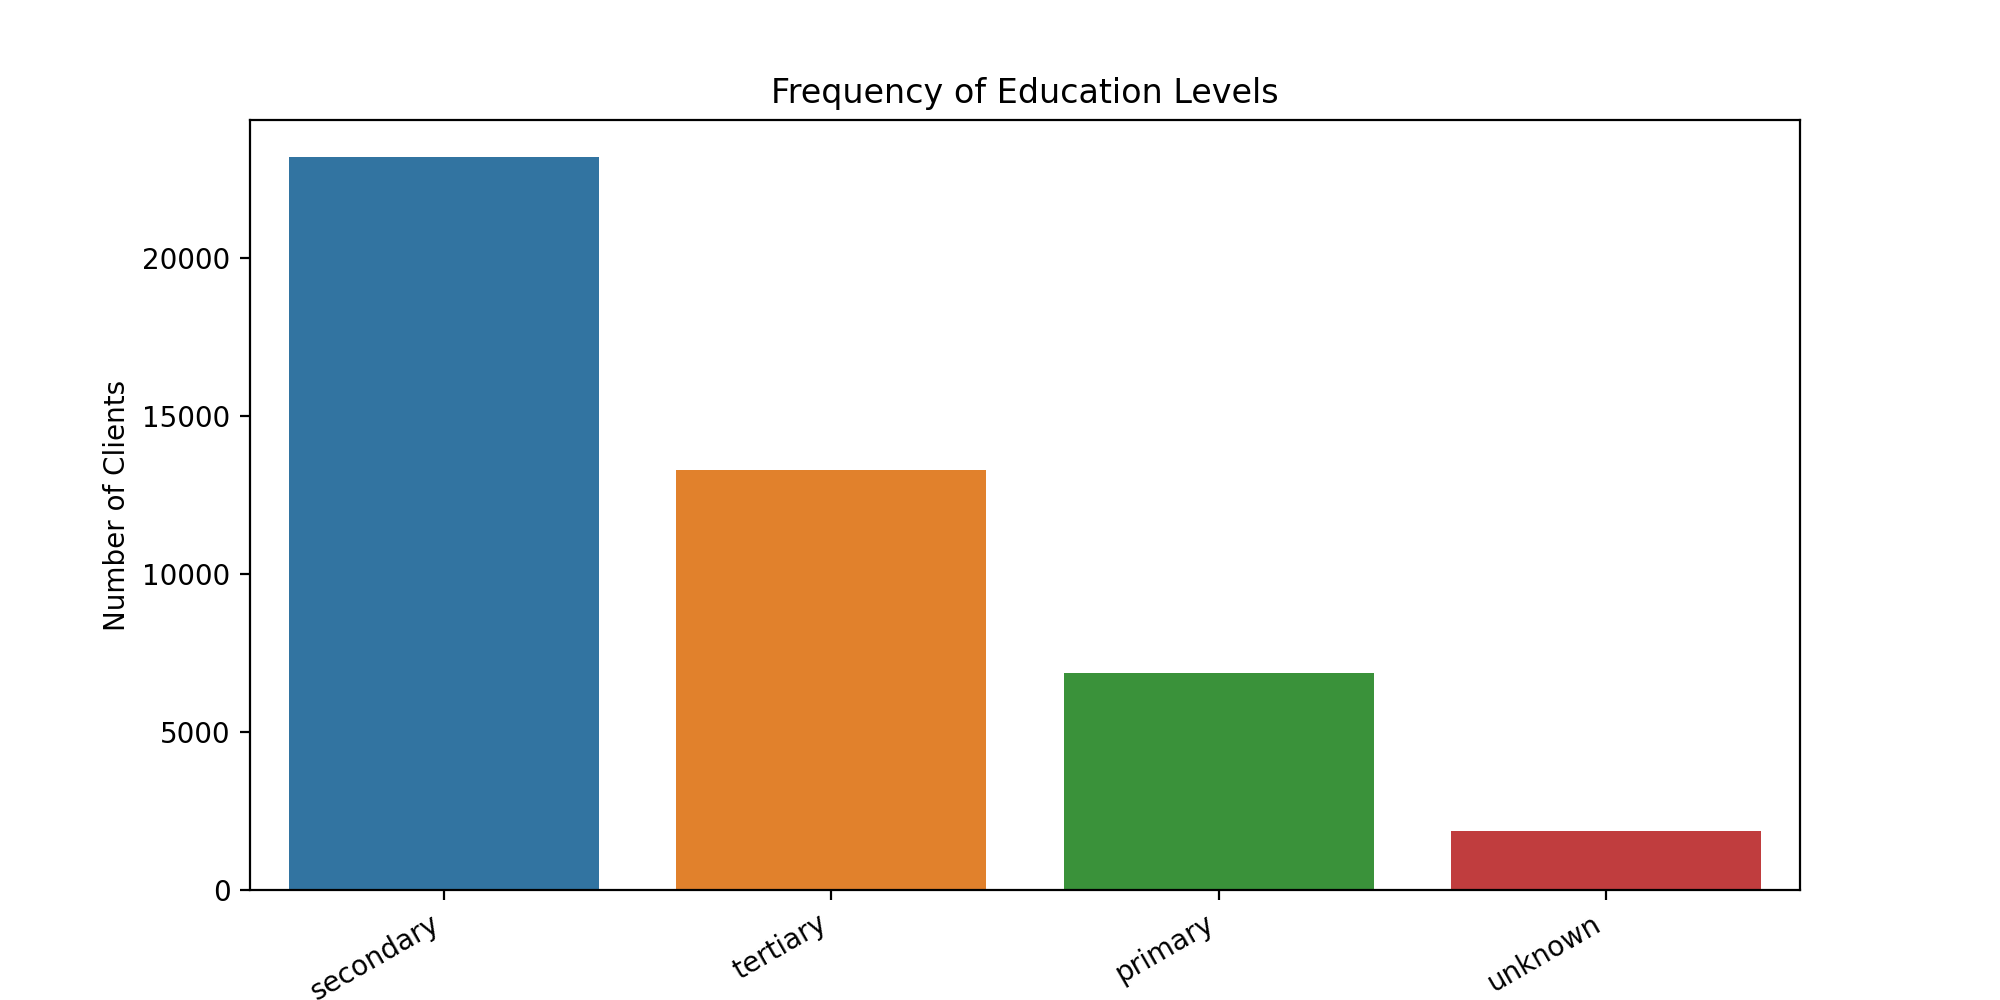

In [17]:
# Analysis for 'education' level
education_counts_pd = df.groupBy('education').count().orderBy(F.desc('count')).toPandas()
plt.figure(figsize=(10, 5))
sns.barplot(data=education_counts_pd, x='education', y='count', hue='education')
plt.title('Frequency of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Number of Clients')
plt.xticks(rotation=30, ha='right')
plt.show()

## Process: Bivariate/Multivariate Analysis <a class="anchor" name="multivariate"></a>
<div style="background:rgba(0,109,174,0.2);padding:10px;border-radius:4px">Here, we explore relationships between variables, focusing on how they relate to our target: subscribed.</div>

#### Question 1: How does age affect subscription status?
We can visualize this by plotting the distribution of age for those who subscribed versus those who did not.

In [18]:
# Step 1: Filter the data in PySpark
subscribed_ages_df = df.filter(F.col('subscribed') == 1).select('age')
not_subscribed_ages_df = df.filter(F.col('subscribed') == 0).select('age')

In [19]:
# Step 2: Convert the results to Pandas
subscribed_ages_pd = subscribed_ages_df.toPandas()
not_subscribed_ages_pd = not_subscribed_ages_df.toPandas()

<IPython.core.display.Javascript object>


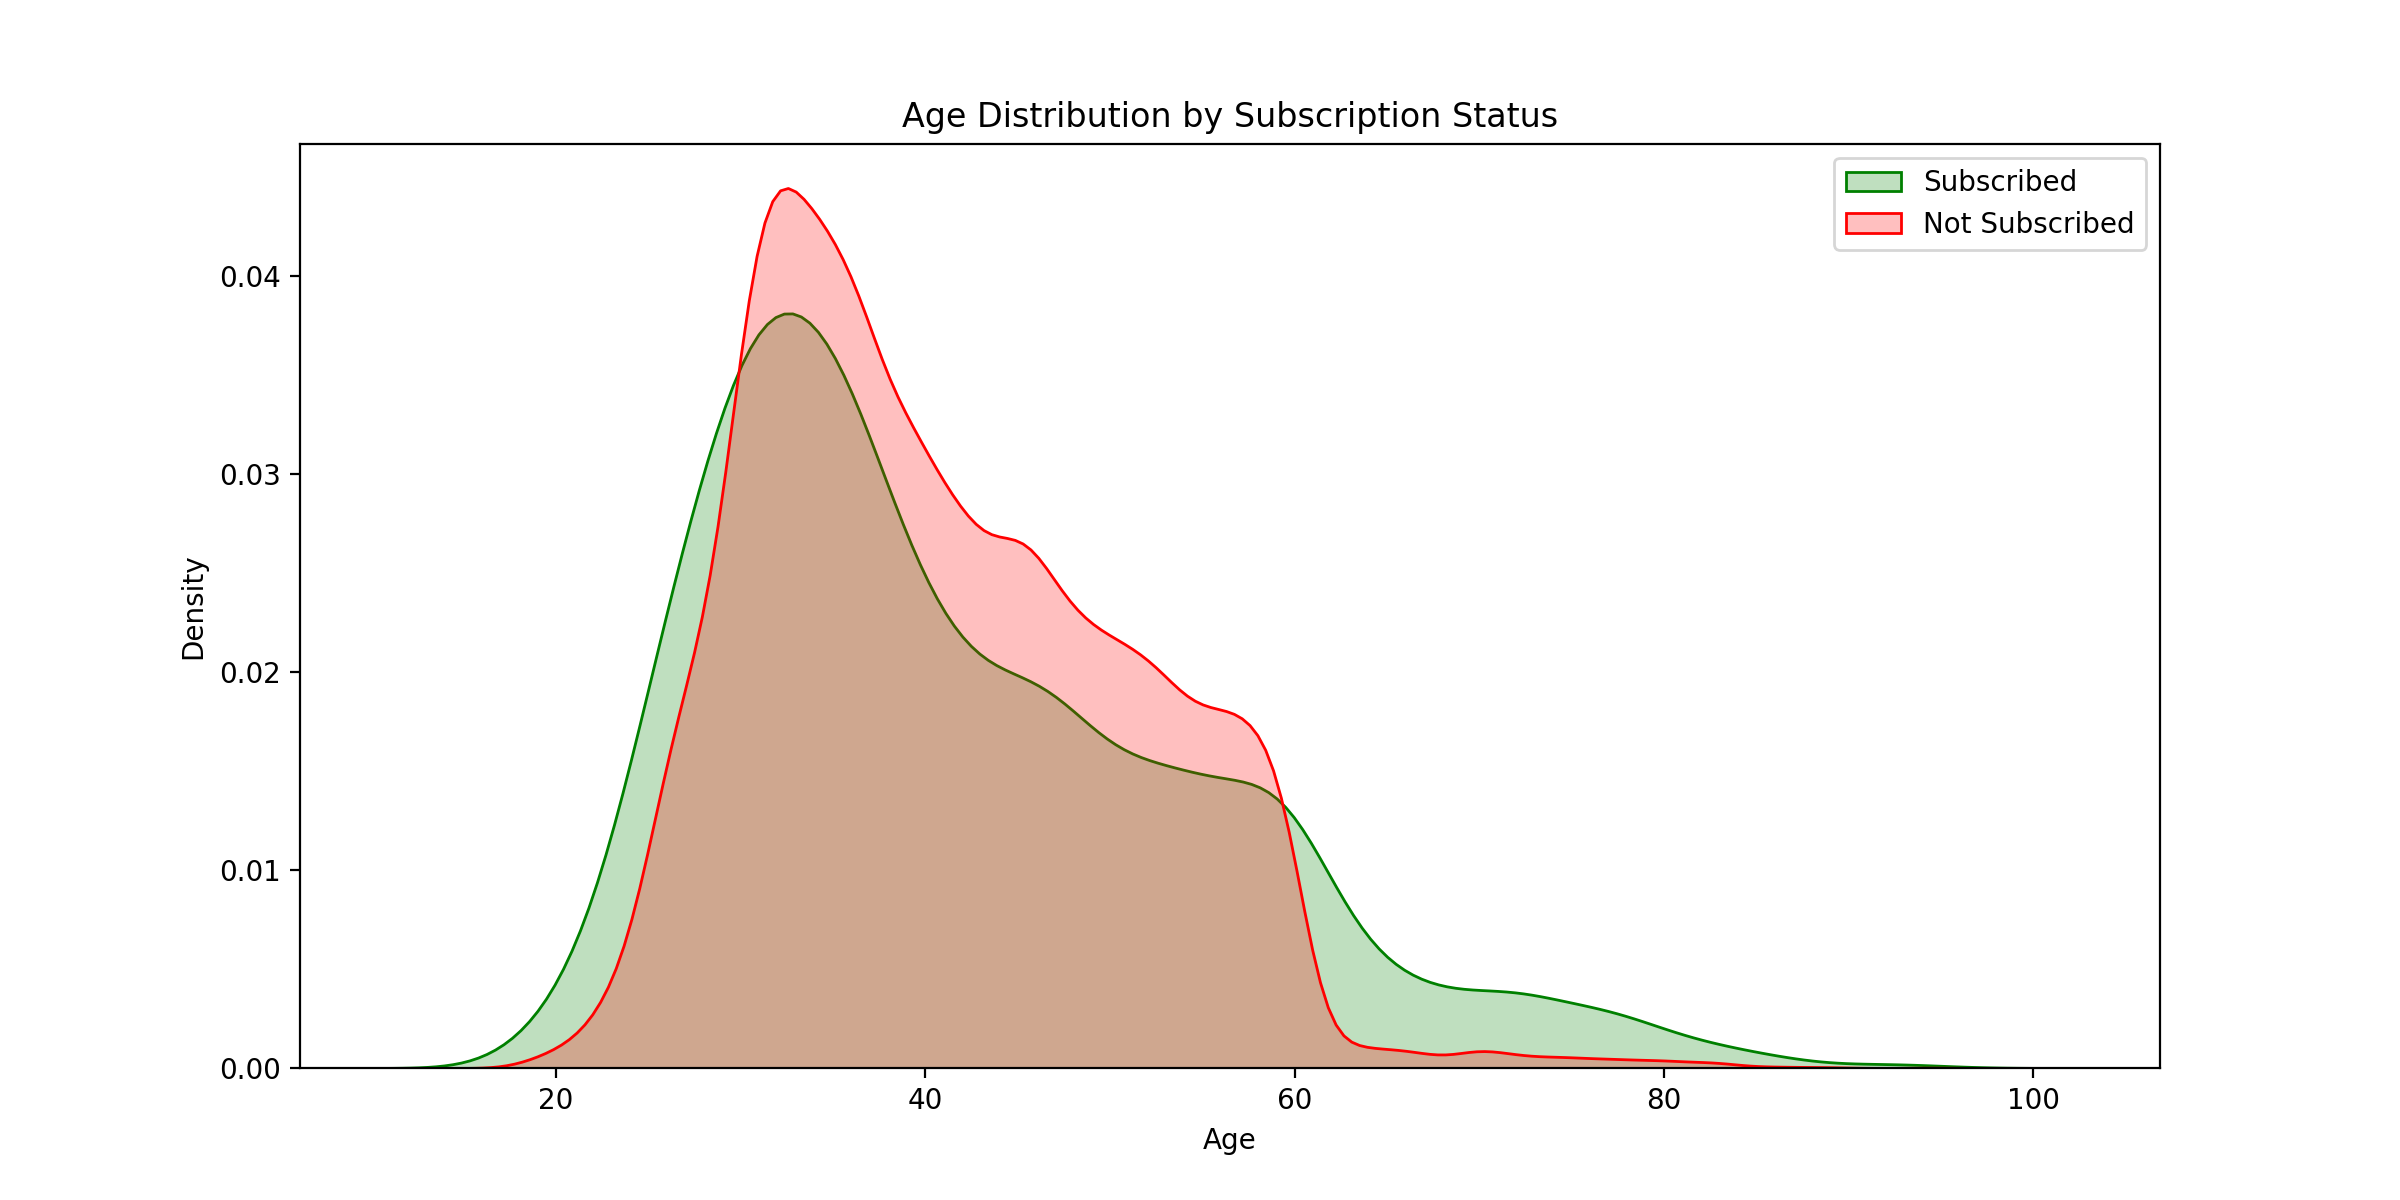

In [20]:
# Step 3: Plot the distributions
plt.figure(figsize=(12, 6))
sns.kdeplot(data=subscribed_ages_pd['age'], label='Subscribed', color='green', fill=True)
sns.kdeplot(data=not_subscribed_ages_pd['age'], label='Not Subscribed', color='red', fill=True)
plt.title('Age Distribution by Subscription Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

<div style="background:rgba(0,109,174,0.2);padding:10px;border-radius:4px">
    <strong>Interpretation:</strong> The plot shows that while the overall distributions are similar, the green "Subscribed" curve has noticeable bumps at older ages (around 60+) compared to the red "Not Subscribed" curve. This suggests that older clients might be more likely to subscribe.
</div>

#### Question 2: Which job types have the highest subscription rates?
Since our subscribed column is 0 or 1, the average of this column for a given group is equal to the rate of 1s (i.e., the subscription rate).


In [21]:
# Step 1: Aggregate in PySpark to calculate the average of 'subscribed' for each job.
job_subscription_rate_df = df.groupBy('job').agg(F.avg('subscribed').alias('subscription_rate')).orderBy(F.desc('subscription_rate'))

In [22]:
# Step 2: Convert to Pandas
job_subscription_rate_pd = job_subscription_rate_df.toPandas()

<IPython.core.display.Javascript object>


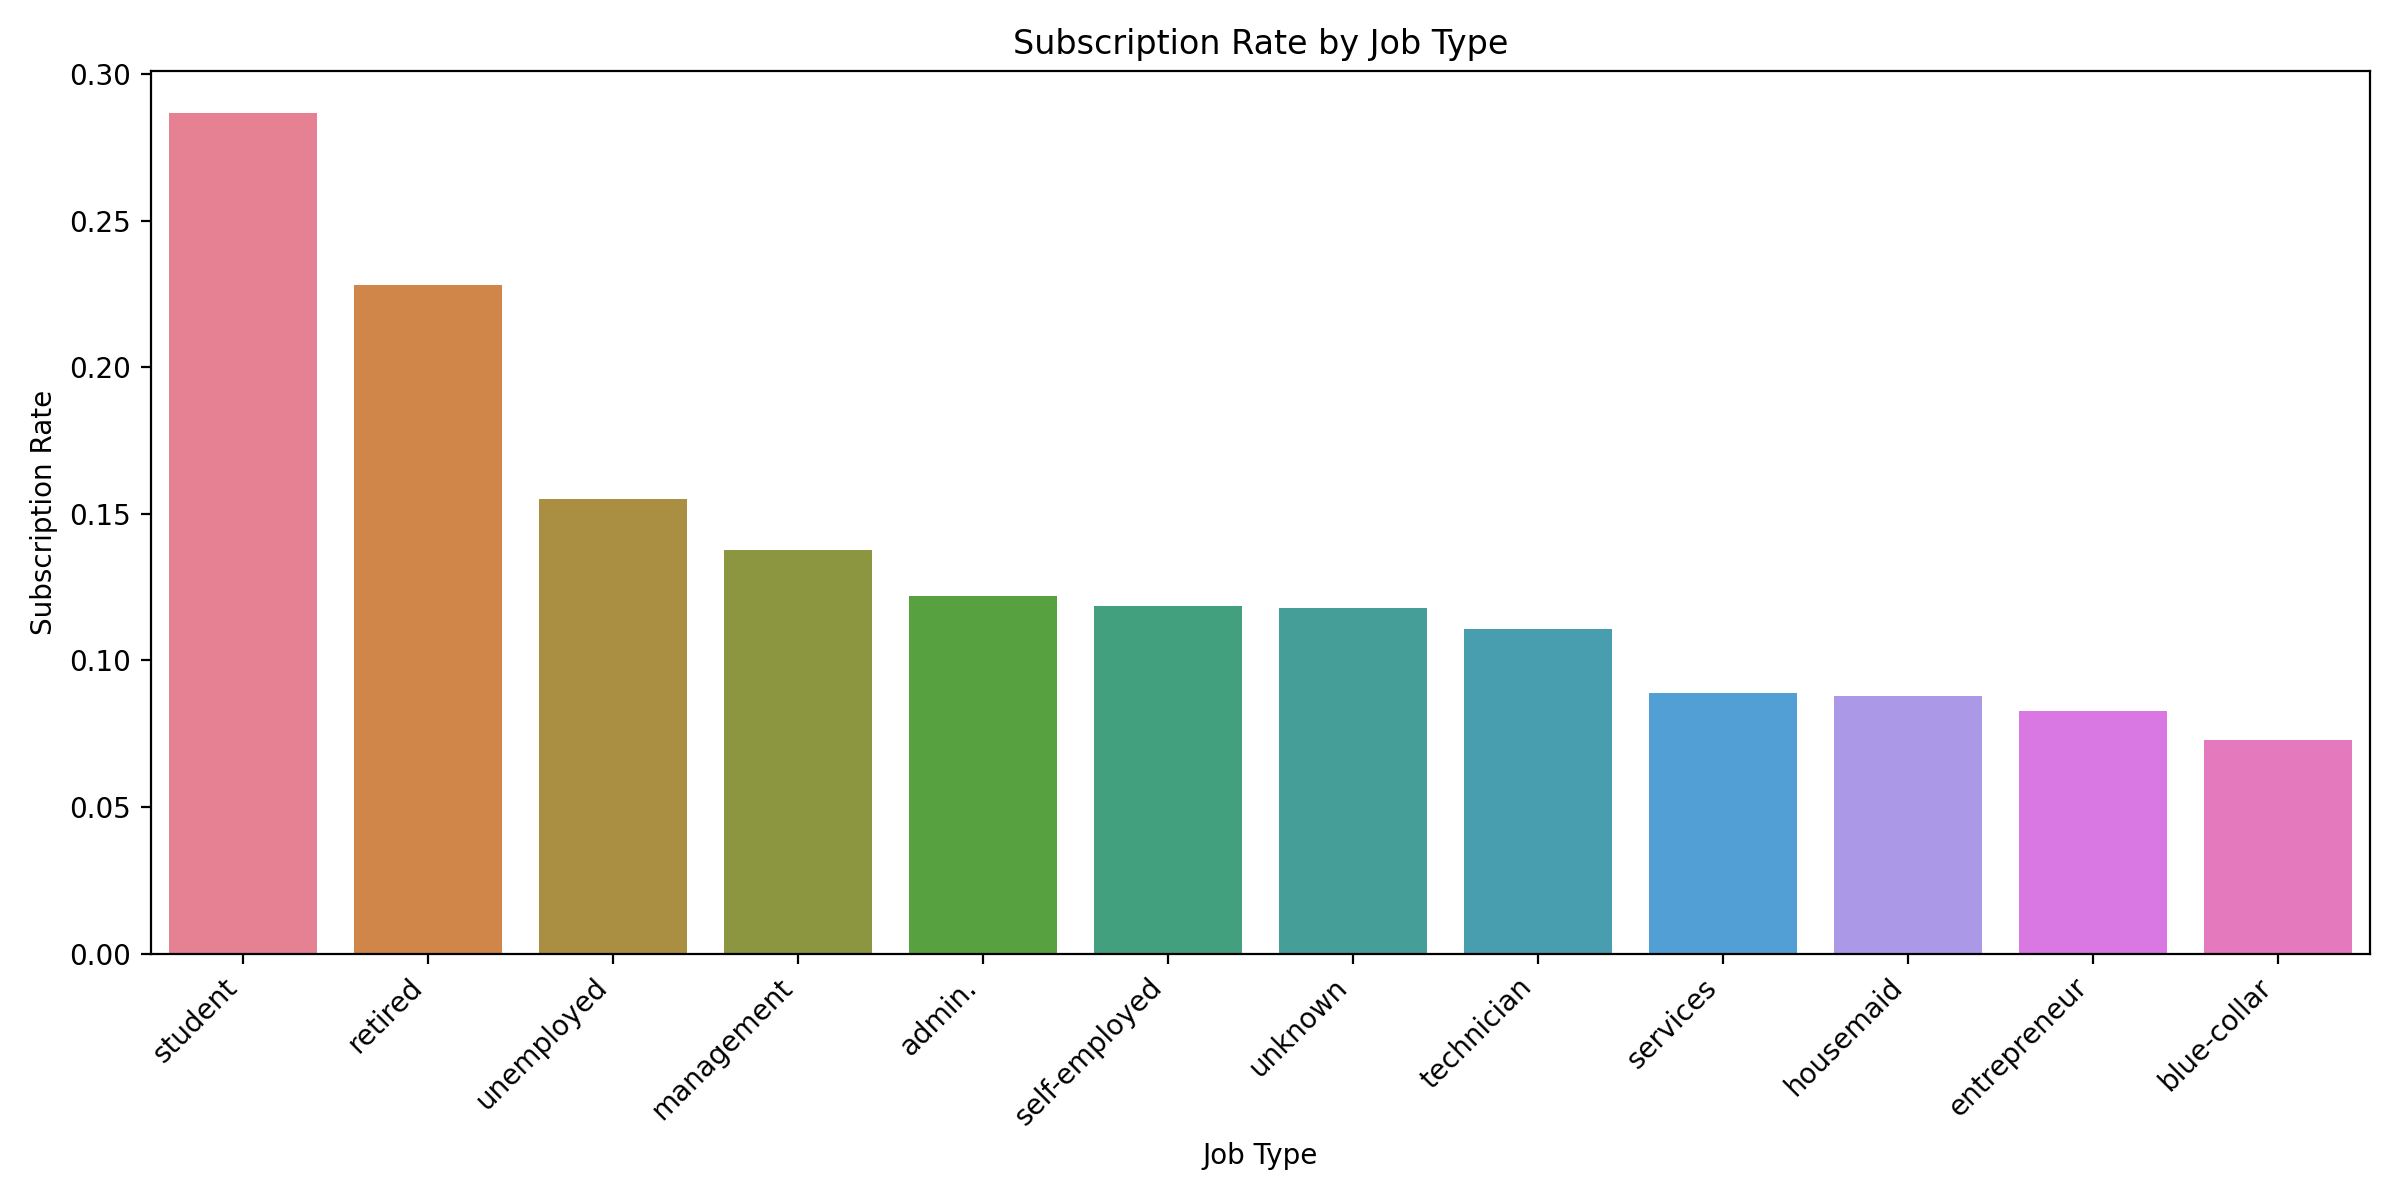

In [23]:
# Step 3: Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(data=job_subscription_rate_pd, x='job', y='subscription_rate', hue='job')
plt.title('Subscription Rate by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### <div style="background:rgba(0,109,174,0.2);padding:10px;border-radius:4px">Question: Which job types have the highest and lowest subscription rates? Does this result surprise you, given what we saw in the univariate analysis? (Hint: blue-collar was the most common job type, but has one of the lowest subscription rates).</div>

## Process: Visualisation & Exploration <a class="anchor" name="process3"></a>

#### Question 3: Is there a relationship between numerical variables?
<div style="background:rgba(0,109,174,0.2);padding:10px;border-radius:4px">A correlation matrix is an excellent tool for this. We will select a few key numerical columns, bring them to Pandas (as this calculation is feasible on a sample or subset), and create a heatmap.</div>

In [24]:
# Step 1: Select numerical columns in PySpark
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'previous']
numerical_df = df.select(numerical_cols)

In [25]:
# Step 2: Convert to Pandas (as this is a small number of columns, we can do this directly for correlation)
corr_pd = numerical_df.toPandas()

<IPython.core.display.Javascript object>


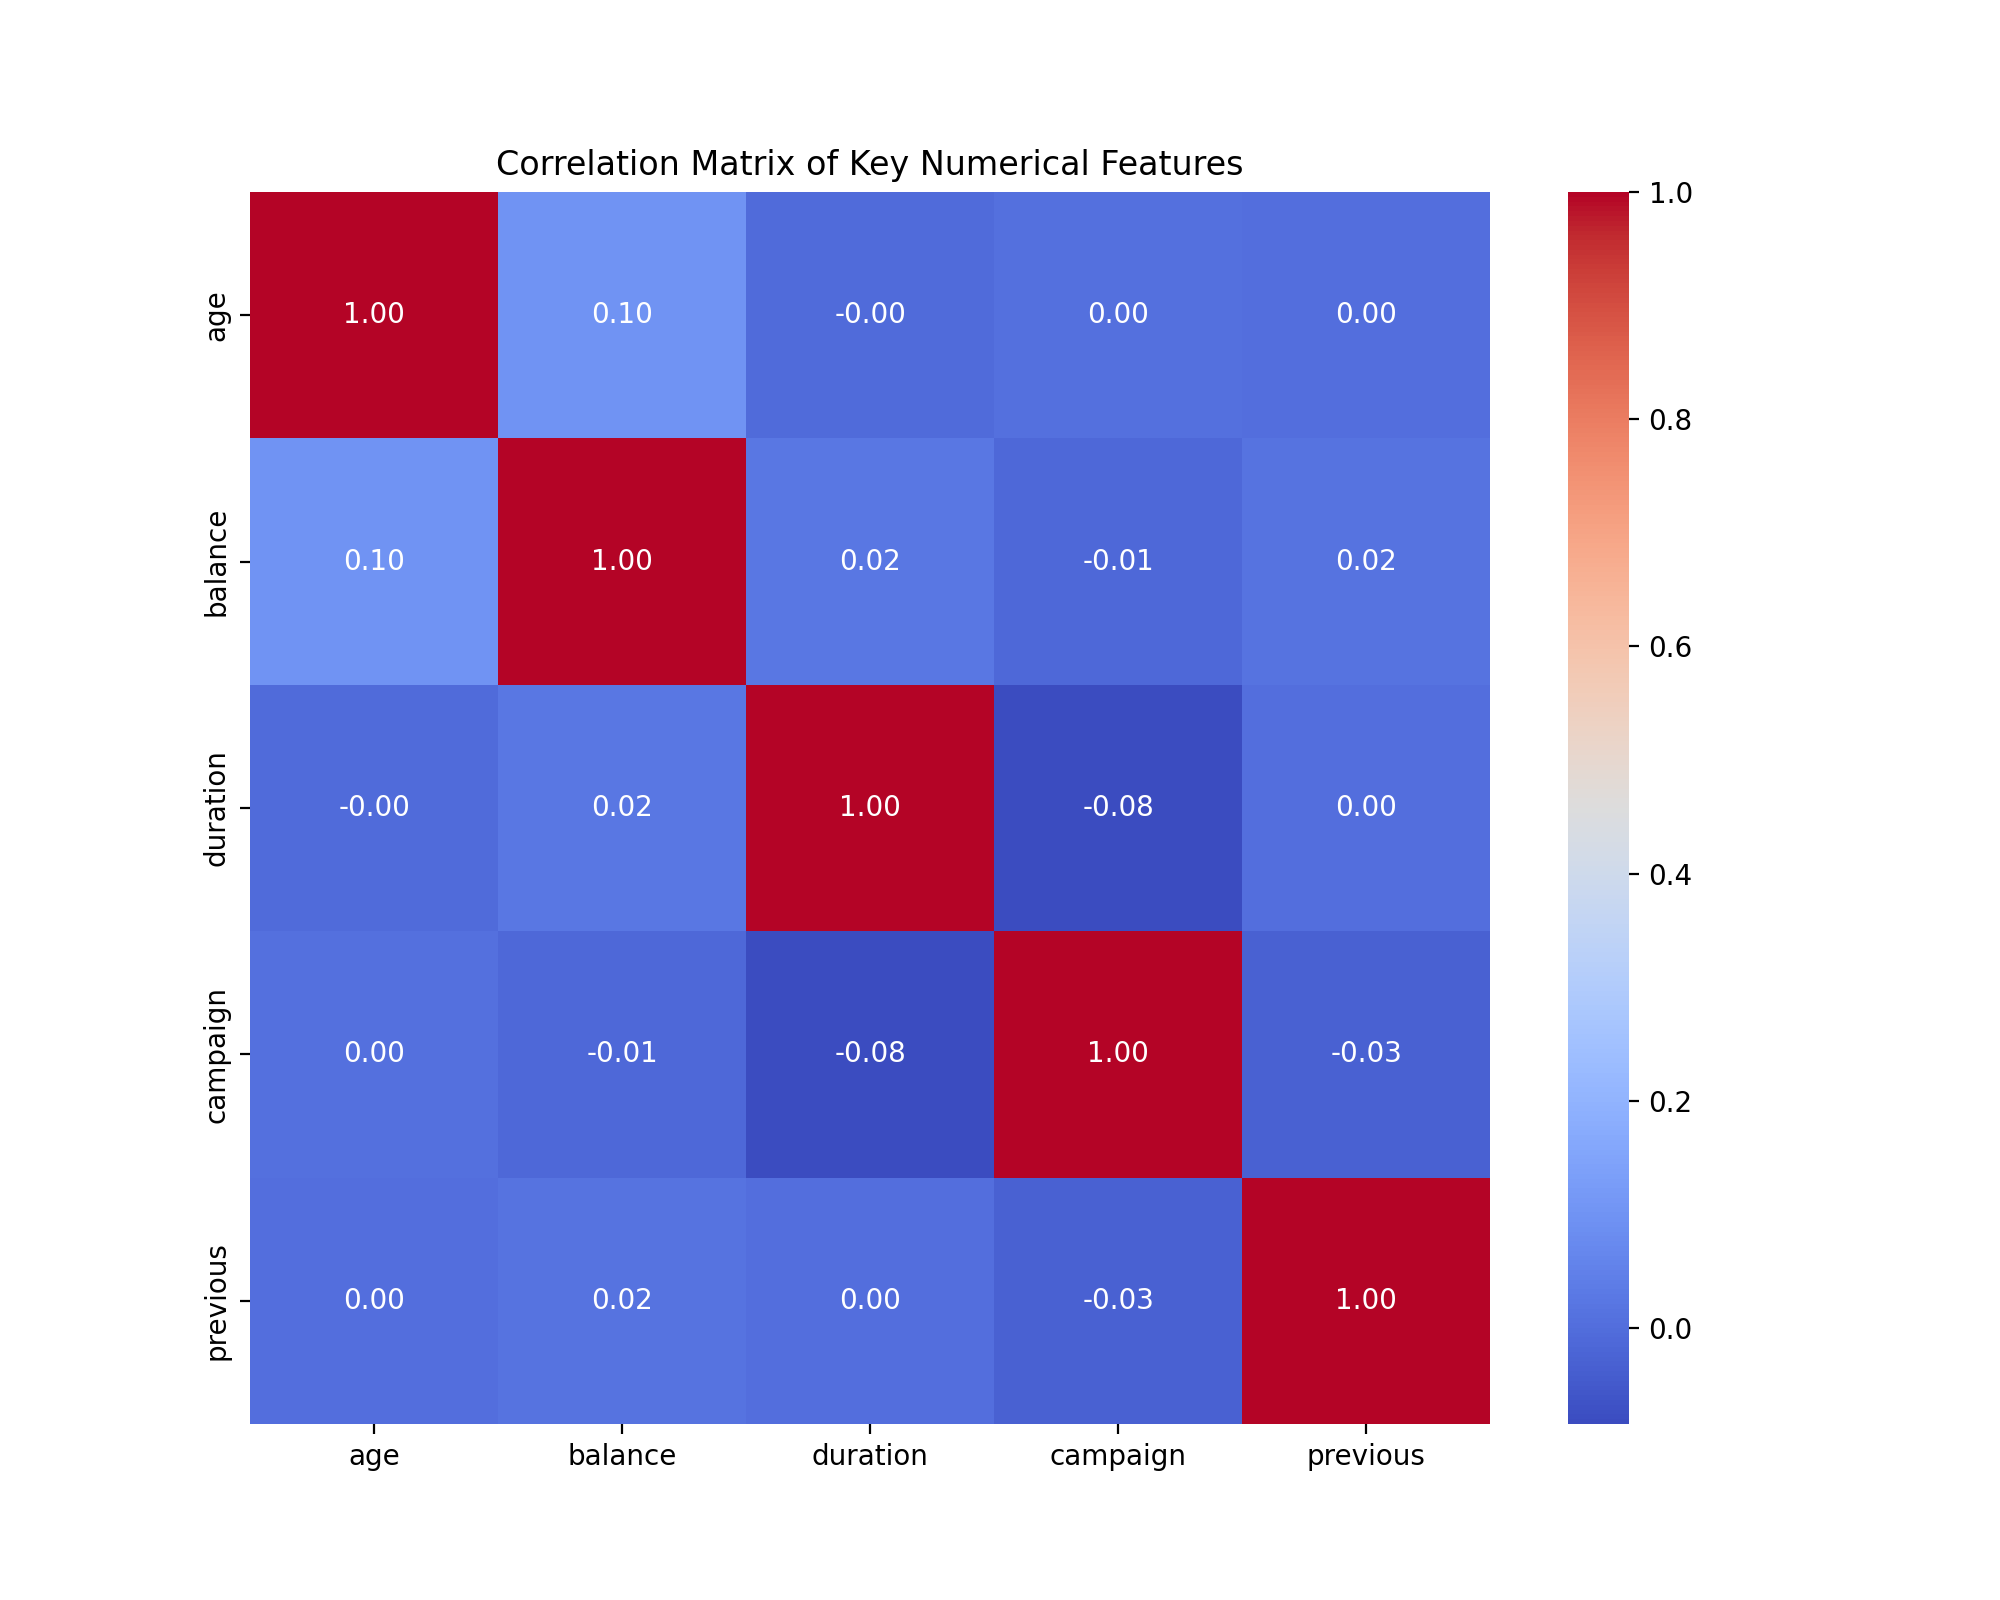

In [26]:
# Step 3: Calculate the correlation matrix and plot the heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = corr_pd.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Numerical Features')
plt.show()

<div style="background:rgba(0,109,174,0.2);padding:10px;border-radius:4px">Interpretation:  
The heatmap shows the correlation coefficients between pairs of variables.  
Notice the relatively strong positive correlation between duration and our target (not shown here but would be if we included subscribed).  
This indicates that longer call durations are associated with a higher likelihood of subscription.  
This makes intuitive sense, but it's important to consider that the call is long because the customer is interested, not the other way around.  
This is known as "data leakage" if used as a predictor in a model.</div>

## Lab Task: Further Process <a class="anchor" name="process4"></a>

### <div style="background:rgba(0,109,174,0.2);padding:10px;border-radius:4px"> Go to https://samplecode.link, learn and try other types of visualisation/plots.</div>

The dataset also has bank-additional-full.csv, explore this additional dataset.

## Findings: Discuss Your Findings with Peer Students <a class="anchor" name="findings"></a>

This is the most important part of EDA: synthesizing our findings into actionable insights and testable hypotheses.   Based on the analysis above, document your key findings and formulate at least two hypotheses.  
Potiential Key Findings:  
1. Finding 1: The most common client profiles are 'blue-collar' or 'management' jobs, married, and with secondary or tertiary education. However, the groups with the highest propensity to subscribe are 'students' and 'retired' individuals.  
1. Finding 2: Age plays a role. While the bulk of clients are in the 30-50 age range, there is a distinct increase in subscription rates among clients older than 60.  
1. Finding 3: The duration of the marketing call is strongly associated with a successful subscription.  

Your Hypotheses:  
1. Hypothesis 1: We hypothesize that clients who are not in the primary workforce (students, retired) are more receptive to marketing for term deposits, possibly due to having available funds (retired) or a longer-term financial outlook (students).  
1. Hypothesis 2: We hypothesize that a marketing campaign specifically tailored to clients over the age of 55 would have a significantly higher conversion rate than a general campaign targeting all age groups.  
1. Hypothesis 3: We hypothesize that clients with a negative bank balance are extremely unlikely to subscribe, and could potentially be excluded from call lists to improve campaign efficiency.  

#### Congratulations on completing this lab!  
You have successfully performed a comprehensive Exploratory Data Analysis on a real-world dataset using Apache PySpark.  
You have practiced the entire workflow:  
- Loading and inspecting large-scale data.  
- Cleaning and preprocessing variables.  
- Analyzing individual variables (univariate analysis).  
- Exploring relationships between variables (bivariate analysis).  
- Mastering the "aggregate in Spark, plot in Pandas" pattern for visualization.  
- Translating analytical findings into business-relevant insights and hypotheses.  
- The insights generated here would be the direct input for the next phase of a data science project, which could involve building a machine learning model to predict which customers are most likely to subscribe. Your EDA has helped identify which features are likely to be important predictors (job, age, duration) and has provided a deep, foundational understanding of the data.  